# Fashion MNIST using PCA and KNN
Motive : Identify the Picture

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("fashion-mnist_train.csv")

In [3]:
df.shape

(60000, 785)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X=df.iloc[:,1:].values

In [12]:
y=df.iloc[:,0].values

In [13]:
import matplotlib.pyplot as plt

In [14]:
a=X[0].reshape(28,28)

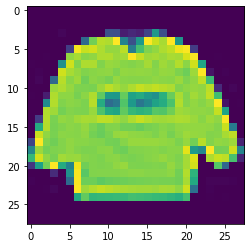

In [15]:
plt.imshow(a)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=5)

In [20]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred=clf.predict(X_test)

## `Now will use PCA, so that the model should take less time in prediction.

In [ ]:
# We need to do feature scaling first.

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

`Apply PCA

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [43]:
print(X_train.shape)
print(X_train_new.shape)

(48000, 784)
(48000, 50)


In [44]:
pca.explained_variance_ratio_

array([0.22078628, 0.14371563, 0.05450815, 0.05129161, 0.04057325,
       0.03011227, 0.02742831, 0.02328288, 0.01700226, 0.01312014,
       0.01157121, 0.00963058, 0.00888128, 0.00849881, 0.00746224,
       0.00732657, 0.00657138, 0.00636418, 0.00623941, 0.00582914,
       0.00516659, 0.00508605, 0.00472443, 0.00454723, 0.00433541,
       0.0041594 , 0.00395726, 0.00392767, 0.00378726, 0.00376829,
       0.00371297, 0.00355064, 0.00337321, 0.00329462, 0.00327852,
       0.00319655, 0.00306649, 0.00295804, 0.00290807, 0.00279929,
       0.00270963, 0.00264265, 0.00257248, 0.00254391, 0.00246253,
       0.00244676, 0.0023912 , 0.00226856, 0.00222631, 0.00215985])

In [41]:
2.20786278e-01

0.220786278

In [45]:
clf.fit(X_train_new,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred_new=clf.predict(X_test_new)

In [47]:
accuracy_score(y_test,y_pred_new)

0.855

In [ ]:
#Let's find the optimal number of PCAs
How will do it?
Will run a loop

In [51]:
accuracy=[]

for i in range (1,785):
    pca = PCA(n_components= i)
    X_tr = pca.fit_transform(X_train)
    X_te = pca.transform(X_test)
    
    clf.fit(X_tr,y_train)
    
    y_pred=clf.predict(X_te)
    
    print(accuracy_score(y_test,y_pred))
    
    accuracy.append(accuracy_score(y_test,y_pred))

0.24008333333333334
0.51075
0.61625
0.6999166666666666
0.7371666666666666
0.7663333333333333
0.7813333333333333
0.7890833333333334
0.7999166666666667
0.81375
0.8190833333333334
0.8236666666666667
0.82575
0.8266666666666667
0.8301666666666667
0.83275
0.834
0.836
0.8390833333333333
0.8415
0.8414166666666667
0.8423333333333334
0.8435
0.8435
0.8458333333333333
0.8465833333333334
0.84675
0.8479166666666667
0.8488333333333333
0.84825
0.8484166666666667
0.8480833333333333
0.8484166666666667
0.8489166666666667
0.8504166666666667
0.8491666666666666
0.85
0.85
0.8499166666666667
0.8530833333333333
0.85275
0.8535833333333334
0.8538333333333333
0.85425
0.8549166666666667
0.8544166666666667
0.8540833333333333
0.8535
0.85475
0.854
0.85425
0.8538333333333333
0.855
0.85425
0.8556666666666667
0.8559166666666667
0.85475
0.8559166666666667
0.8550833333333333
0.8559166666666667
0.8565833333333334
0.8580833333333333
0.8570833333333333
0.85875
0.8595833333333334
0.85875
0.8598333333333333
0.8600833333333333


KeyboardInterrupt: 